<a href="https://colab.research.google.com/github/alexeylazarev13/da_homeworks/blob/main/project_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import io
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import *
%matplotlib inline
plt.style.use('ggplot')
import json
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [6]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/csv/wiki_movie_plots_deduped.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.tail(5)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...
34885,2017,İstanbul Kırmızısı,Turkish,Ferzan Özpetek,"Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...",romantic,https://en.wikipedia.org/wiki/%C4%B0stanbul_K%...,The writer Orhan Şahin returns to İstanbul aft...


**Быстрый анализ датасета с помощью sweetviz:**

In [8]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import sweetviz as sv
my_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [10]:
my_report.show_html('SWEETVIZ_REPORT.html')

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



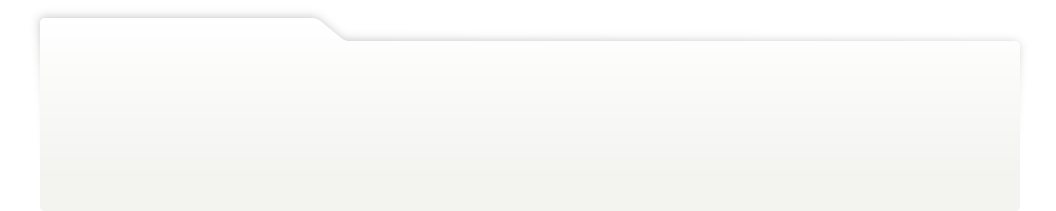
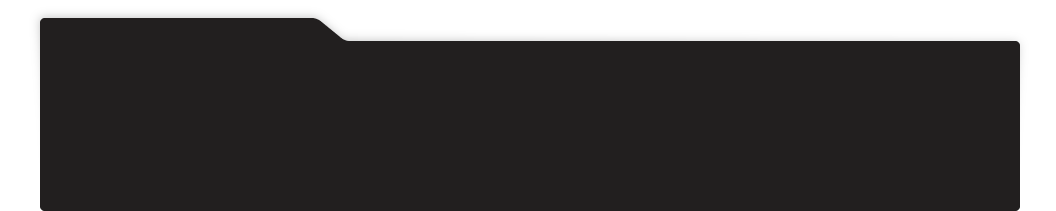
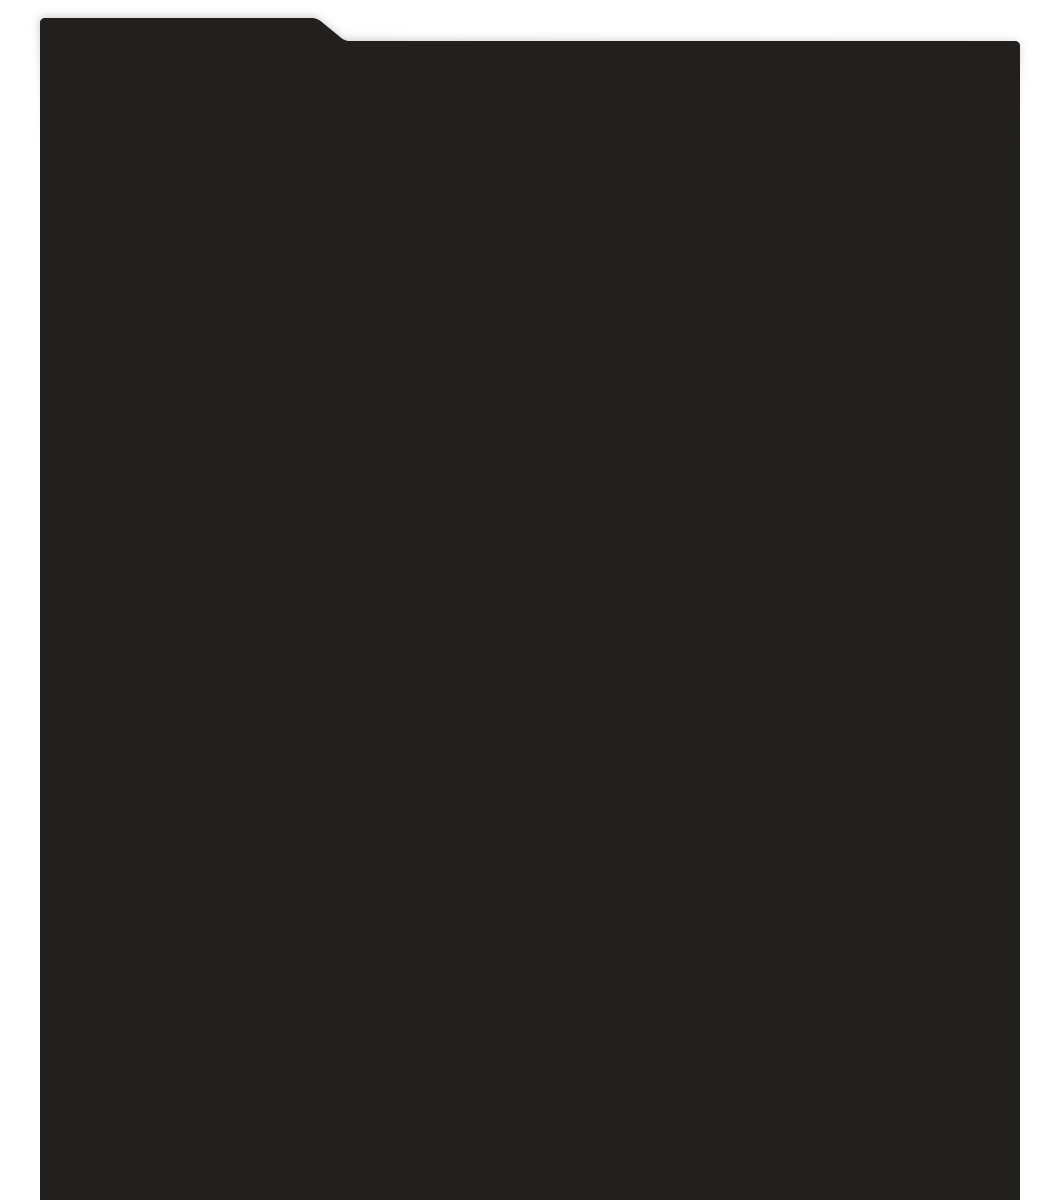
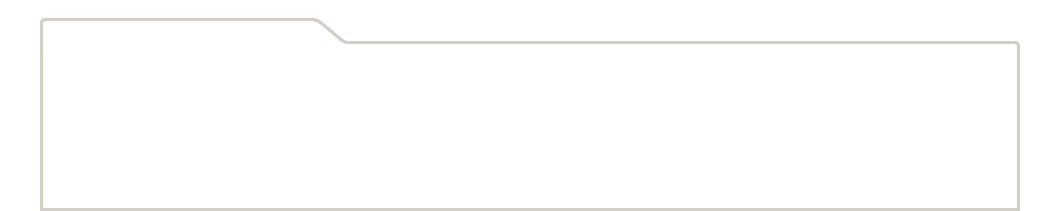
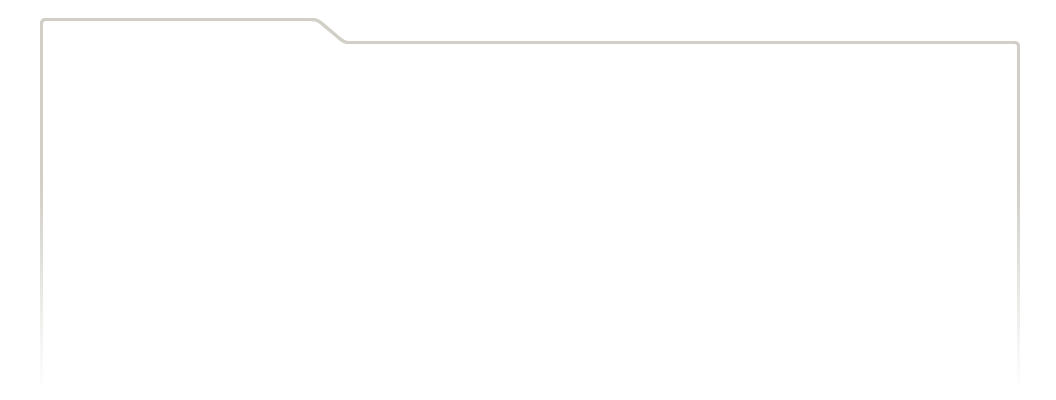
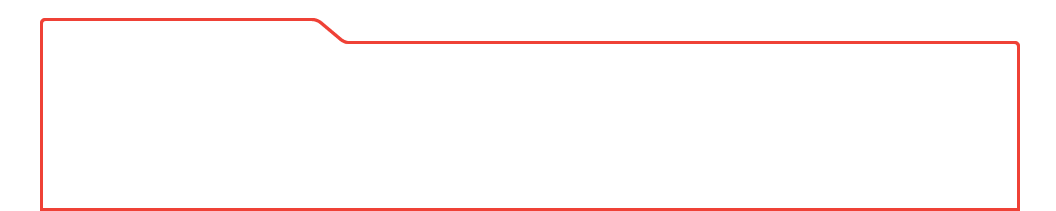
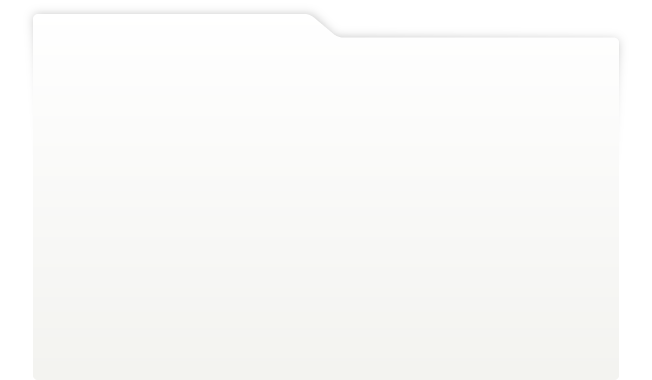
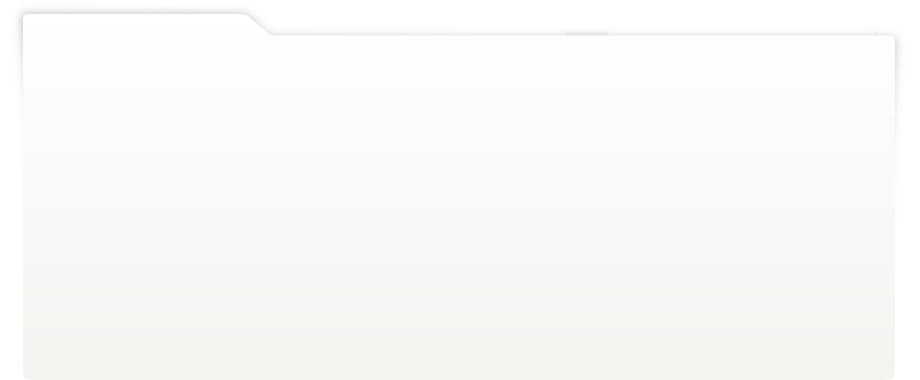
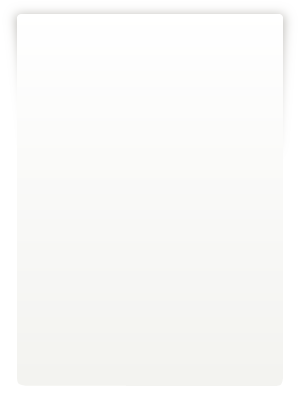
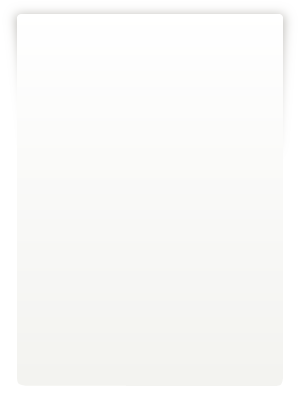
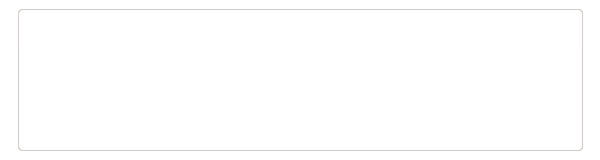
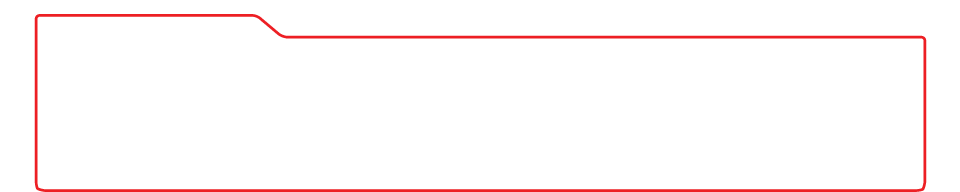
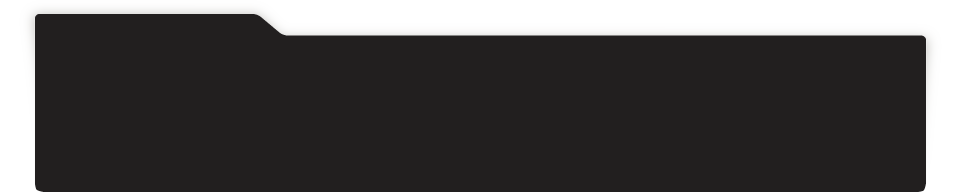
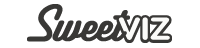
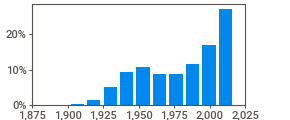
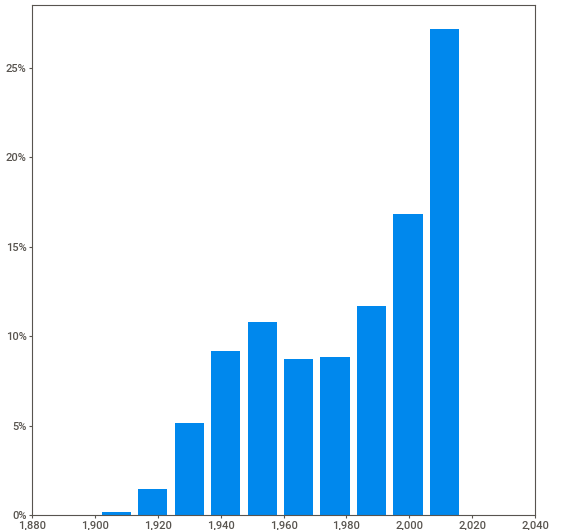
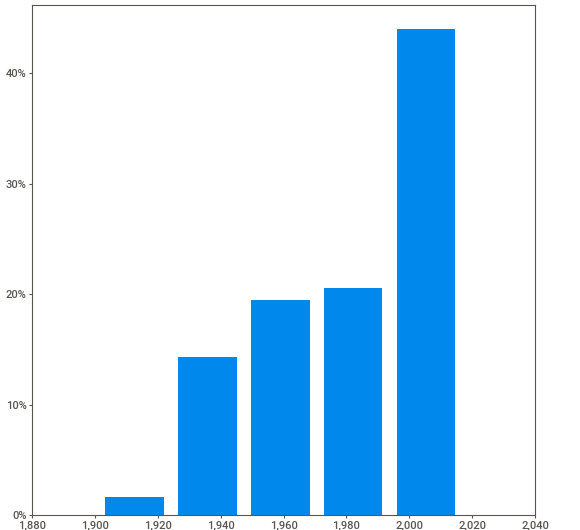
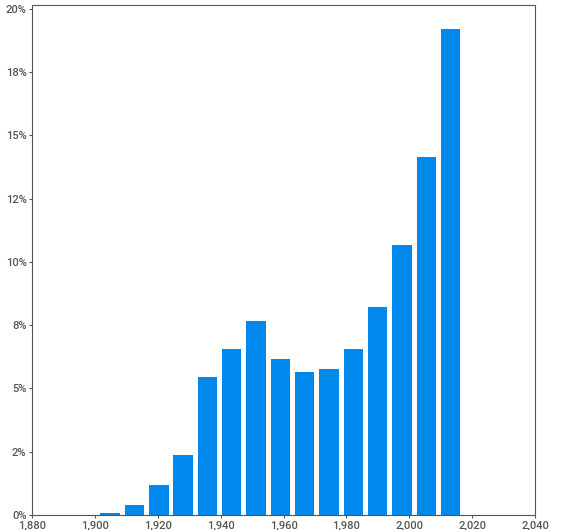
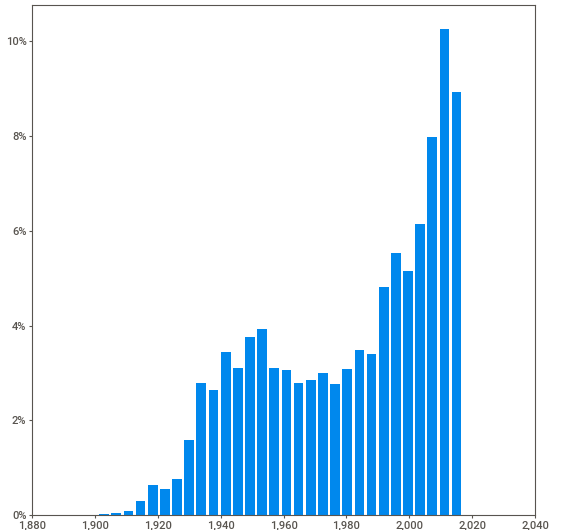
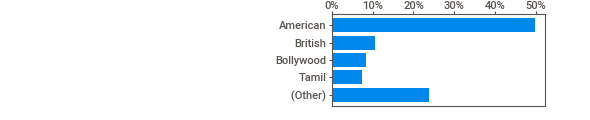
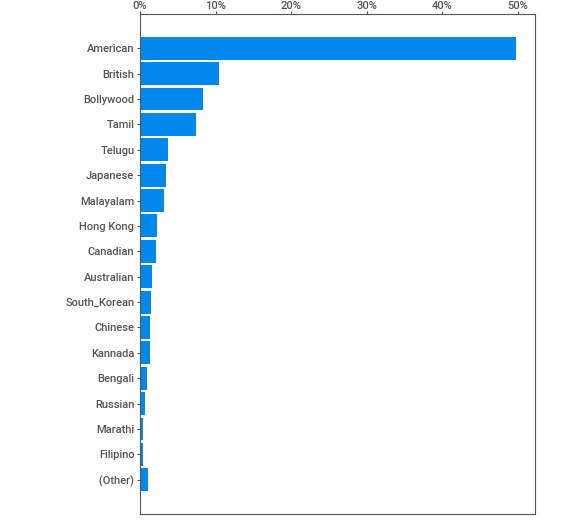
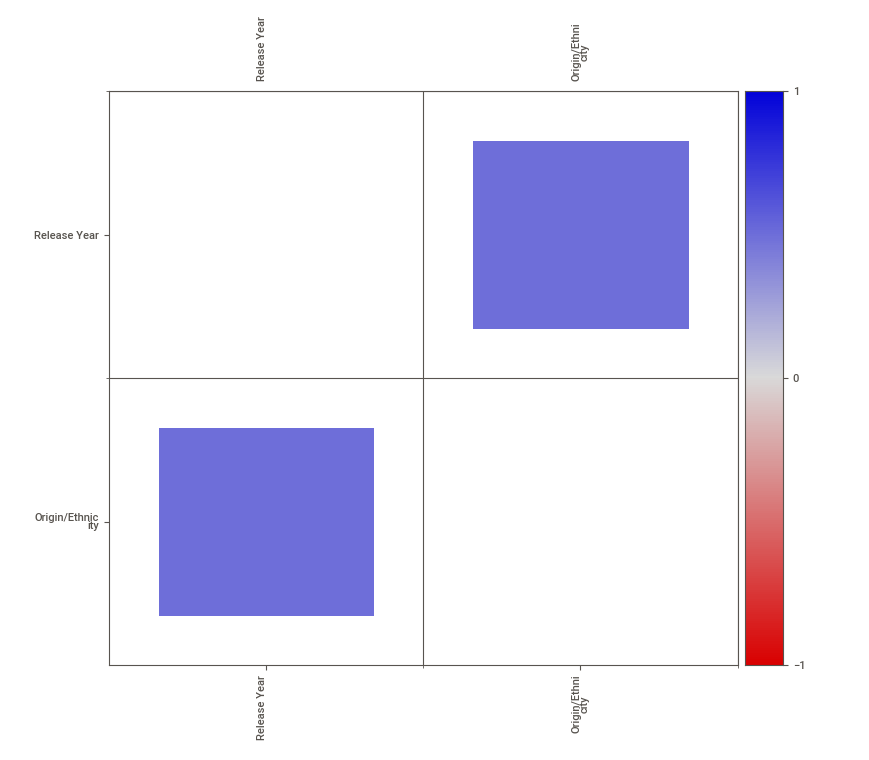
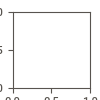

In [11]:
import IPython
IPython.display.HTML(filename='SWEETVIZ_REPORT.html')

**1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам**

**1.1 Гистограмма по самым популярных жанрам:**

In [12]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts


unknown      6083
drama        5964
comedy       4379
horror       1167
action       1098
thriller      966
romance       923
western       865
crime         568
adventure     526
musical       467
Name: Genre, dtype: int64

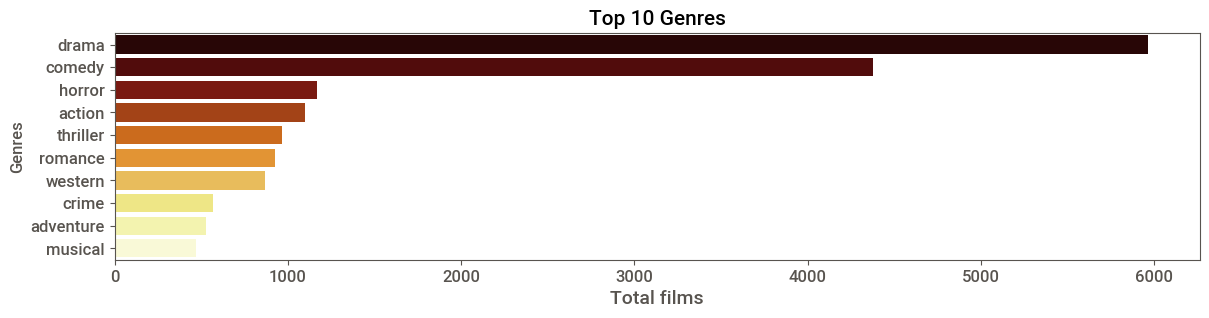

In [13]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts_without_unknown =  genre_counts[['drama', 'comedy', 'horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical']]
new_genre_counts_without_unknown = genre_counts_without_unknown.reset_index()
new_genre_counts_without_unknown.rename(columns={'index': 'genre', 'Genre': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))

sns.barplot(y=new_genre_counts_without_unknown['genre'],x=new_genre_counts_without_unknown['count'],data=new_genre_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Total films',fontsize=14)
#plt.xlabel('',fontsize=12)
plt.ylabel('Genres',fontsize=12)
plt.title('Top 10 Genres',fontsize=15)
plt.show()

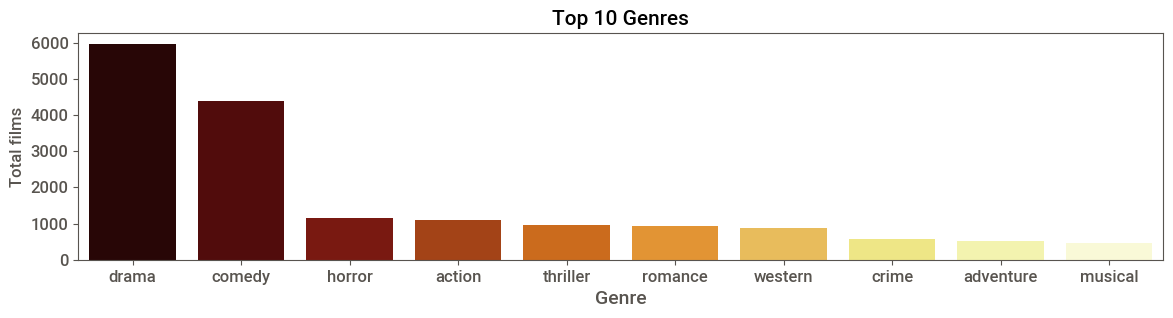

In [14]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts_without_unknown =  genre_counts[['drama', 'comedy', 'horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical']]
new_genre_counts_without_unknown = genre_counts_without_unknown.reset_index()
new_genre_counts_without_unknown.rename(columns={'index': 'genre', 'Genre': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=new_genre_counts_without_unknown['count'],x=new_genre_counts_without_unknown['genre'],data=new_genre_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Total films',fontsize=12)
plt.title('Top 10 Genres',fontsize=15)
plt.show()

**1.2 Гистограмма по самым популярных режиссерам:**

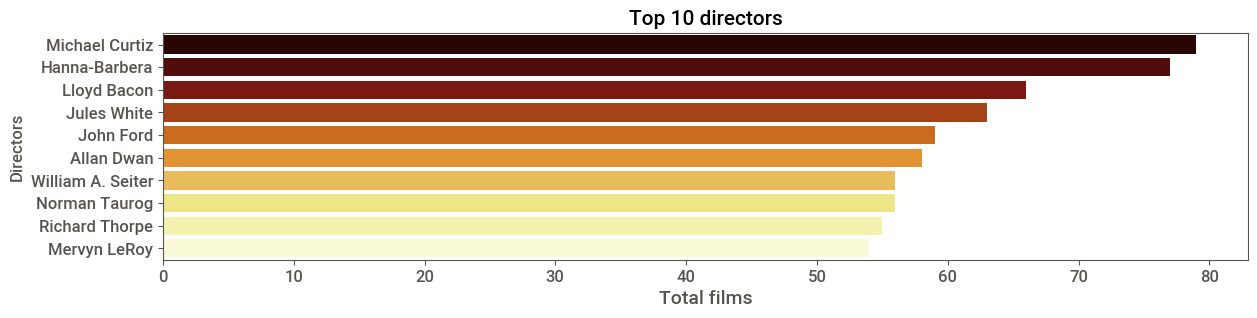

CPU times: user 207 ms, sys: 4.17 ms, total: 211 ms
Wall time: 212 ms


In [15]:
%%time
director_counts = df["Director"].value_counts().head(11)
director_counts_without_unknown =  director_counts[['Michael Curtiz', 'Hanna-Barbera', 'Lloyd Bacon', 'Jules White', 'John Ford', 'Allan Dwan', 'William A. Seiter', 'Norman Taurog', 'Richard Thorpe', 'Mervyn LeRoy']]
new_director_counts_without_unknown = director_counts_without_unknown.reset_index()
new_director_counts_without_unknown.rename(columns={'index': 'director', 'Director': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=new_director_counts_without_unknown['director'],x=new_director_counts_without_unknown['count'],data=new_director_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Total films',fontsize=14)
plt.ylabel('Directors',fontsize=12)
plt.title('Top 10 directors',fontsize=15)
plt.show()


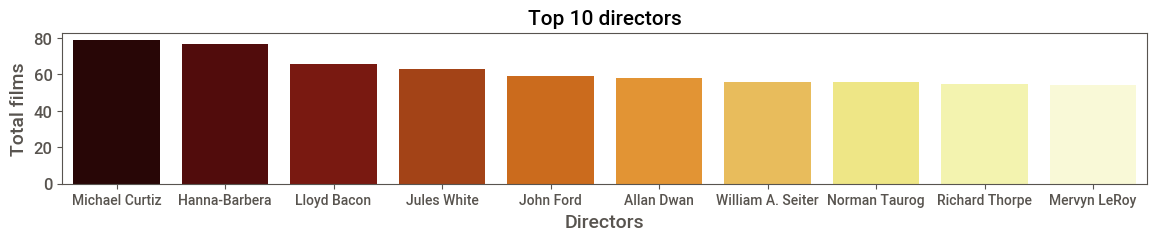

In [16]:
director_counts = df["Director"].value_counts().head(11)
director_counts_without_unknown =  director_counts[['Michael Curtiz', 'Hanna-Barbera', 'Lloyd Bacon', 'Jules White', 'John Ford', 'Allan Dwan', 'William A. Seiter', 'Norman Taurog', 'Richard Thorpe', 'Mervyn LeRoy']]
new_director_counts_without_unknown = director_counts_without_unknown.reset_index()
new_director_counts_without_unknown.rename(columns={'index': 'director', 'Director': 'count'}, inplace=True)
plt.subplots(figsize=(14,2))
sns.barplot(y=new_director_counts_without_unknown['count'],x=new_director_counts_without_unknown['director'],data=new_director_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=10)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Directors',fontsize=14)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 directors',fontsize=15)
plt.show()


**1.3 Гистограмма по самым популярных нац. принадлежностям фильмов:**

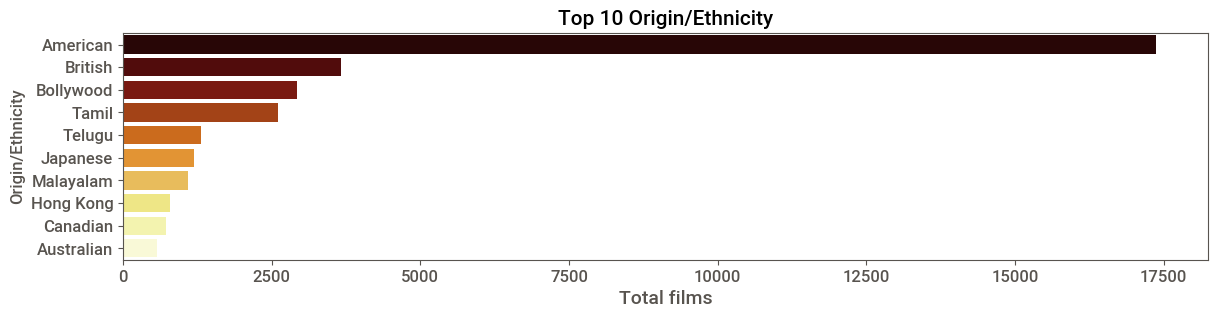

In [17]:
origin_counts = df["Origin/Ethnicity"].value_counts().head(10)
origin_counts =  origin_counts[['American', 'British', 'Bollywood', 'Tamil', 'Telugu', 'Japanese', 'Malayalam', 'Hong Kong', 'Canadian', 'Australian']]
origin_counts_wo_index = origin_counts.reset_index()
origin_counts_wo_index.rename(columns={'index': 'origin', 'Origin/Ethnicity': 'count'}, inplace=True)

plt.subplots(figsize=(14,3))
sns.barplot(y=origin_counts_wo_index['origin'],x=origin_counts_wo_index['count'],data=origin_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Total films',fontsize=14)
plt.ylabel('Origin/Ethnicity',fontsize=12)
plt.title('Top 10 Origin/Ethnicity',fontsize=15)
plt.show()

**1.4 Гистограмма по самым популярным годам производства фильмов:**

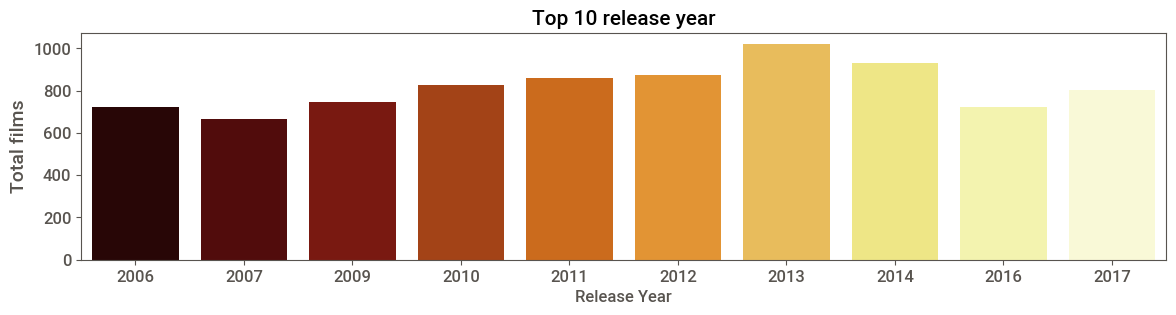

In [18]:
release_year_counts = df["Release Year"].value_counts().head(10)
release_year_counts_wo_index = release_year_counts.reset_index()
release_year_counts_wo_index.rename(columns={'index': 'release year', 'Release Year': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=release_year_counts_wo_index['count'],x=release_year_counts_wo_index['release year'],data=release_year_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 release year',fontsize=15)
plt.show()


**2. Sentiment analysis по отзывам (используя  nltk.classify) и оценка, как распределяется sentiment по актерам, режиссерам и жанрам**

In [19]:
df.head(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


**Чистим данные:**

In [20]:
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [21]:
df_copy = df.copy()

In [22]:
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Перевод в нижний регистр:**

In [23]:
df_copy['Plot'] = df_copy['Plot'].str.lower()
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed..."


**Удаление знаков препинания:**

In [24]:
df_copy["Plot_replace"] = df_copy['Plot'].str.replace('[^\w\s]','')
#df = df.drop('column_name', axis=1)

In [25]:
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Plot_replace
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed...",the film just over a minute long is composed o...


**Удаление стоп-слов:**

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stopWords=set(stopwords.words('english'))
print(stopWords)

{'does', 'how', 'below', 'if', 'all', 'll', "aren't", 'both', 'were', 'with', "needn't", 'each', 'so', "mustn't", "don't", 'mightn', 'be', 'when', 'the', 'being', 'what', 'are', 'ain', 'after', 'because', "you'd", 've', 'haven', 'as', "haven't", 'shouldn', "shouldn't", "you've", 'those', 'ours', 'too', 'any', 'a', "you'll", 'under', 'before', 'in', 'hadn', 'needn', 'theirs', 'hasn', 'again', 'more', 'having', "you're", 'it', 'you', 'only', 'y', "won't", 'an', 'some', 'won', 'their', 'to', 'while', 'then', 'further', 't', 'ma', 'your', 'have', "mightn't", 're', 'than', "wasn't", 'd', 'not', 'he', 'herself', 'this', 'has', 'off', 'during', 'did', 'and', 'now', 'been', 'through', 'itself', 'do', 'weren', "didn't", "weren't", 'should', "isn't", 'from', 'doesn', 'aren', 'him', 'her', "it's", 'at', 'm', 'didn', 'can', "should've", 'over', 'that', 'against', 'wasn', 'who', 'his', 'down', "hadn't", "wouldn't", 'whom', 'or', 'no', 'same', 'for', 'into', 'doing', 'its', 'had', "doesn't", 'himsel

In [ ]:
#!pip install -U spacy

In [29]:
import texthero as hero

In [31]:
df_copy["Plot_replace_without_stopwords"] = hero.remove_stopwords(df_copy['Plot_replace'])

In [33]:
df_copy['Plot_replace_without_stopwords'].head(5)

0     bartender  working   saloon serving drinks  c...
1     moon painted   smiling face hangs   park  nig...
2     film    minute long  composed  two shots   fi...
3    lasting  61 seconds  consisting  two shots  fi...
4     earliest known adaptation   classic fairytale...
Name: Plot_replace_without_stopwords, dtype: object

In [34]:
df_copy.head(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Plot_replace,Plot_replace_without_stopwords
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...,bartender working saloon serving drinks c...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...,moon painted smiling face hangs park nig...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed...",the film just over a minute long is composed o...,film minute long composed two shots fi...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",lasting just 61 seconds and consisting of two ...,lasting just 61 seconds and consisting of two ...,lasting 61 seconds consisting two shots fi...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,the earliest known adaptation of the classic f...,the earliest known adaptation of the classic f...,earliest known adaptation classic fairytale...


**Оценка как распределяется sentiment по жанрам:**

In [35]:
data = df_copy[['Plot_replace_without_stopwords', 'Genre']]

In [44]:
data.head(5)

,Plot_replace_without_stopwords,Genre
0,bartender working saloon serving drinks c...,unknown
1,moon painted smiling face hangs park nig...,unknown
2,film minute long composed two shots fi...,unknown
3,lasting 61 seconds consisting two shots fi...,unknown
4,earliest known adaptation classic fairytale...,unknown


In [50]:
from collections import Counter
counter_most_common = Counter(" ".join(data["Plot_replace_without_stopwords"]).split()).most_common(10)
counter_most_common

[('one', 28865),
 ('back', 22336),
 ('father', 20114),
 ('two', 19861),
 ('tells', 19614),
 ('love', 19444),
 ('also', 17519),
 ('home', 17461),
 ('later', 17200),
 ('get', 16846)]

Задаем 2 списка с позитивными и негативными словами, прогоняем датафрейм, выставляем оценку каждому фильму. Строим график по жанрам.

In [ ]:
positive = []
negative = []